In [1]:
# From https://deeplearningcourses.com/c/cutting-edge-artificial-intelligence
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def evolution_strategy(
    f,
    population_size,
    sigma,
    lr,
    initial_params,
    num_iters):

  # assume initial params is a 1-D array
  num_params = len(initial_params)
  reward_per_iteration = np.zeros(num_iters)

  params = initial_params
  #print(params)
  #print()
  for t in range(num_iters):
    N = np.random.randn(population_size, num_params)
    #print(N)
    R = np.zeros(population_size) # stores the reward

    # loop through each "offspring"
    for j in range(population_size):
      params_try = params + sigma*N[j]
      R[j] = f(params_try)

    m = R.mean()
    A = (R - m) / R.std()
    #print(R)
    #print(m)
    #print(R.std())
    #print(A)
    
    reward_per_iteration[t] = m
    params = params + lr/(population_size*sigma) * np.dot(N.T, A)
    #print(params)
    #print()
  return params, reward_per_iteration

In [3]:
def reward_function(params):
  x0 = params[0]
  x1 = params[1]
  x2 = params[2]
  return -(x0**2 + 0.1*(x1 - 10)**2 + 0.5*(x2 + 20)**2)

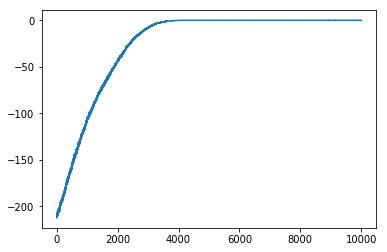

Final params: [ -0.0214839    9.98001188 -19.98064004]


In [4]:
if __name__ == '__main__':
  best_params, rewards = evolution_strategy(
    f=reward_function,
    population_size=2,
    sigma=0.1,
    lr=1e-3,
    initial_params=np.random.randn(3),
    num_iters=10000,
  )

  # plot the rewards per iteration
  plt.plot(rewards)
  plt.show()

  # final params
print("Final params:", best_params)